In [1]:
from IPython.display import clear_output

In [2]:
!pip install git+https://github.com/AryaAftab/sincnet-tensorflow.git
clear_output()

In [3]:
import numpy as np

import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv1D
from tensorflow.keras.layers import LeakyReLU, BatchNormalization, Flatten, MaxPooling1D, Input

from sincnet_tensorflow import SincConv1D, LayerNorm


out_dim = 50 #number of classes

sinc_layer = SincConv1D(N_filt=64,
                        Filt_dim=129,
                        fs=16000,
                        stride=16,
                        padding="SAME")


inputs = Input((32000, 1)) 

x = sinc_layer(inputs)
x = LayerNorm()(x)

x = LeakyReLU(alpha=0.2)(x)
x = MaxPooling1D(pool_size=2)(x)


x = Conv1D(64, 3, strides=1, padding='valid')(x)
x = BatchNormalization(momentum=0.05)(x)
x = LeakyReLU(alpha=0.2)(x)
x = MaxPooling1D(pool_size=2)(x)

x = Conv1D(64, 3, strides=1, padding='valid')(x)
x = BatchNormalization(momentum=0.05)(x)
x = LeakyReLU(alpha=0.2)(x)
x = MaxPooling1D(pool_size=2)(x)

x = Conv1D(128, 3, strides=1, padding='valid')(x)
x = BatchNormalization(momentum=0.05)(x)
x = LeakyReLU(alpha=0.2)(x)
x = MaxPooling1D(pool_size=2)(x)

x = Conv1D(128, 3, strides=1, padding='valid')(x)
x = BatchNormalization(momentum=0.05)(x)
x = LeakyReLU(alpha=0.2)(x)
x = MaxPooling1D(pool_size=2)(x)

x = Flatten()(x)

x = Dense(256)(x)
x = BatchNormalization(momentum=0.05, epsilon=1e-5)(x)
x = LeakyReLU(alpha=0.2)(x)

x = Dense(256)(x)
x = BatchNormalization(momentum=0.05, epsilon=1e-5)(x)
x = LeakyReLU(alpha=0.2)(x)

prediction = Dense(out_dim, activation='softmax')(x)
model = tf.keras.models.Model(inputs=inputs, outputs=prediction)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32000, 1)]        0         
_________________________________________________________________
sinc_conv1d (SincConv1D)     (None, 2000, 64)          128       
_________________________________________________________________
layer_norm (LayerNorm)       (None, 2000, 64)          128       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 2000, 64)          0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1000, 64)          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 998, 64)           12352     
_________________________________________________________________
batch_normalization (BatchNo (None, 998, 64)           256   

In [4]:
# dummy dataset
x_train = np.random.randn(10000, 32000, 1)
y_train = np.random.randint(0, out_dim, 10000)


model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy"])

history = model.fit(x_train,
                    y_train,
                    batch_size=64,
                    epochs=5,
                    validation_split=0.1)

Epoch 1/5
141/141 [==============================] - 42s 79ms/step - loss: 4.2943 - accuracy: 0.0180 - val_loss: 4.2802 - val_accuracy: 0.0290
Epoch 2/5
141/141 [==============================] - 10s 71ms/step - loss: 3.2159 - accuracy: 0.2043 - val_loss: 4.3003 - val_accuracy: 0.0260
Epoch 3/5
141/141 [==============================] - 10s 71ms/step - loss: 2.3618 - accuracy: 0.5916 - val_loss: 4.3303 - val_accuracy: 0.0190
Epoch 4/5
141/141 [==============================] - 10s 71ms/step - loss: 1.6351 - accuracy: 0.8724 - val_loss: 4.4434 - val_accuracy: 0.0210
Epoch 5/5
141/141 [==============================] - 10s 71ms/step - loss: 1.0408 - accuracy: 0.9763 - val_loss: 4.5461 - val_accuracy: 0.0240


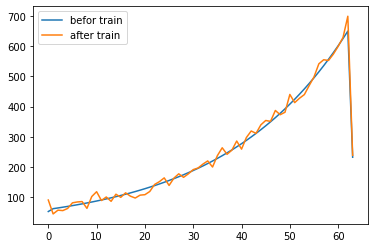

In [5]:
import matplotlib.pyplot as plt

plt.plot(sinc_layer.B2 - sinc_layer.B1, label="befor train")
plt.plot(sinc_layer.filt_band.numpy() * sinc_layer.freq_scale, label="after train")
plt.legend()